# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


# Menangani Missing Value

In [14]:
# Mencek missing value
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


There is no nulls values

# Menangani Outliers

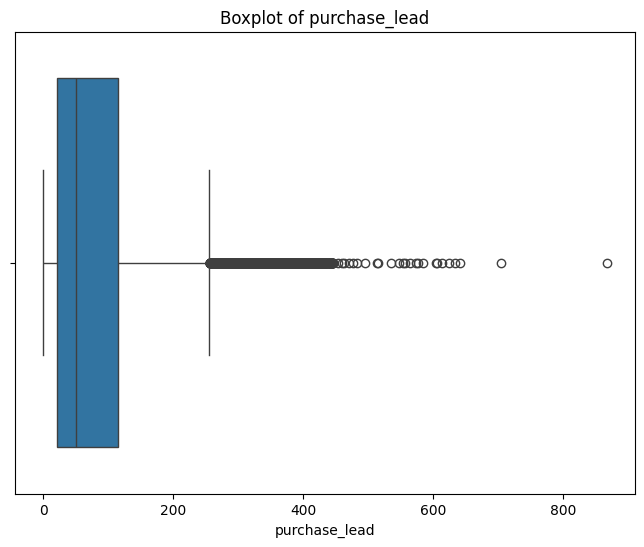

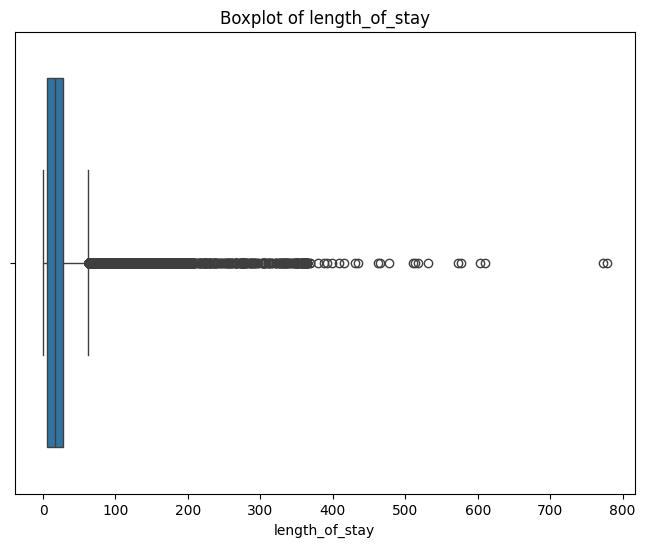

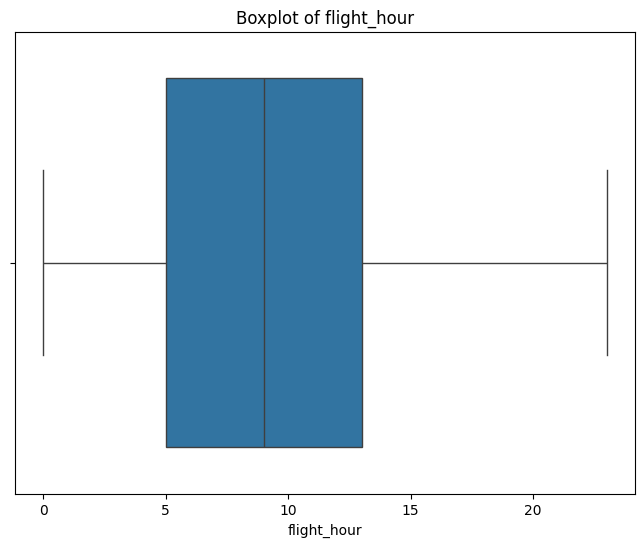

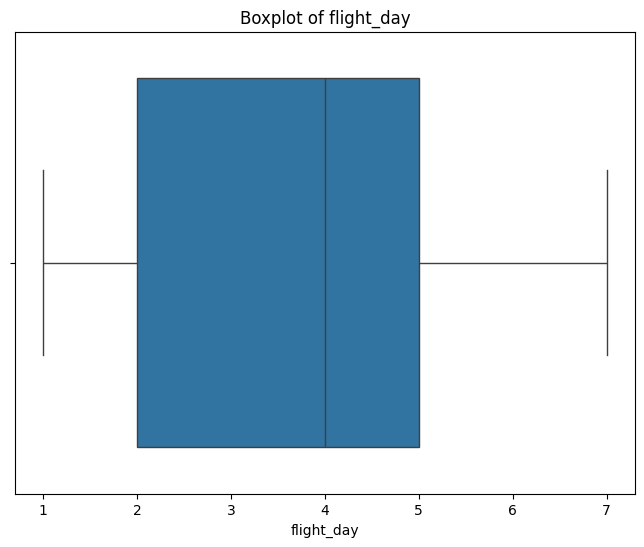

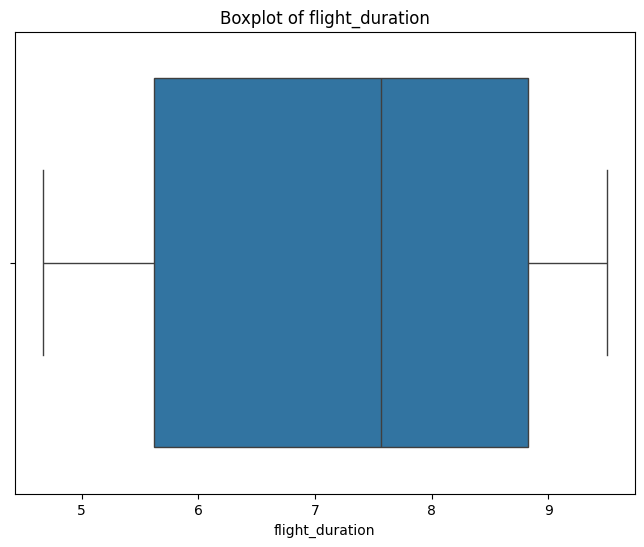

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numerical features and create box plots
numerical_features = [ 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


In [18]:
#  Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
diamonds = df[filter_outliers]

# Cek urutan dataset setelah outlier dihapus
df.shape


(50000, 14)

#**Univariate Analysis**

In [19]:
numerical_features = [ 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration']
categorical_features = ['sales_channel', 'trip_type', 'route', 'booking_origin']

**Categorical Features**

Feature sales_channel

               Count  Percent
sales_channel                
Internet       44382   88.764
Mobile          5618   11.236


<Axes: title={'center': 'sales_channel'}, xlabel='sales_channel'>

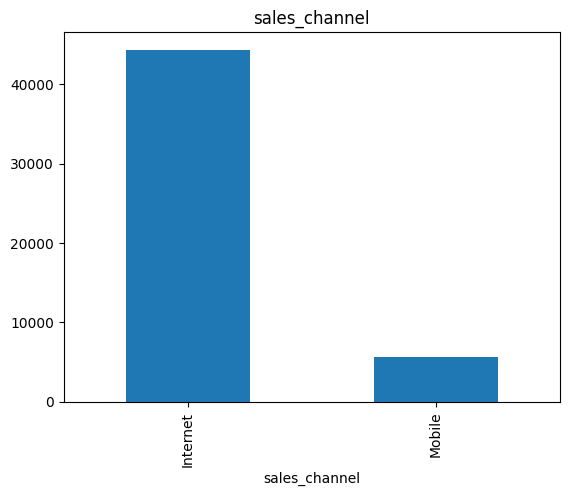

In [21]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Count': count, 'Percent': percent})
print(data)
count.plot(kind='bar', title=feature)



Feature Trip_type


            Count  Percent
trip_type                 
RoundTrip   49497   98.994
OneWay        387    0.774
CircleTrip    116    0.232


<Axes: title={'center': 'trip_type'}, xlabel='trip_type'>

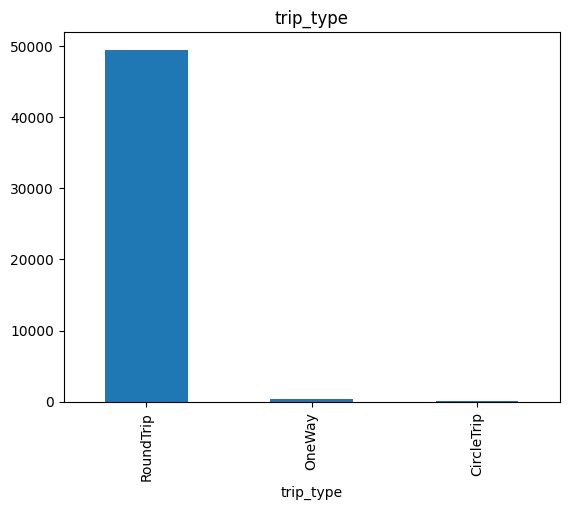

In [22]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Count': count, 'Percent': percent})
print(data)
count.plot(kind='bar', title=feature)



Feature Route

        Count  Percent
route                 
AKLDEL    NaN    0.040
AKLHGH    NaN    0.002
AKLHND    NaN    0.004
AKLICN    NaN    0.140
AKLKIX    NaN    0.016
...       ...      ...
TRZWUH    NaN    0.026
TRZXIY    NaN    0.012
TWUWUH    NaN    0.004
TWUXIY    NaN    0.014
URTXIY    NaN    0.002

[799 rows x 2 columns]


<Axes: title={'center': 'route'}, xlabel='route'>

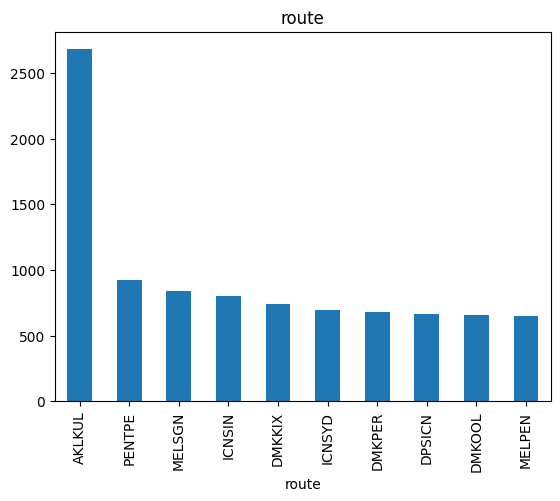

In [25]:
feature = categorical_features[2]
count = df[feature].value_counts().head(10)
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Count': count, 'Percent': percent})
print(data)
count.plot(kind='bar', title=feature)



Feature Booking Origin

                        Count  Percent
booking_origin                        
(not set)                 NaN    0.168
Afghanistan               NaN    0.002
Algeria                   NaN    0.002
Argentina                 NaN    0.012
Australia             17872.0   35.744
...                       ...      ...
United Arab Emirates      NaN    0.084
United Kingdom            NaN    0.346
United States             NaN    0.912
Vanuatu                   NaN    0.002
Vietnam                   NaN    0.776

[104 rows x 2 columns]


<Axes: title={'center': 'booking_origin'}, xlabel='booking_origin'>

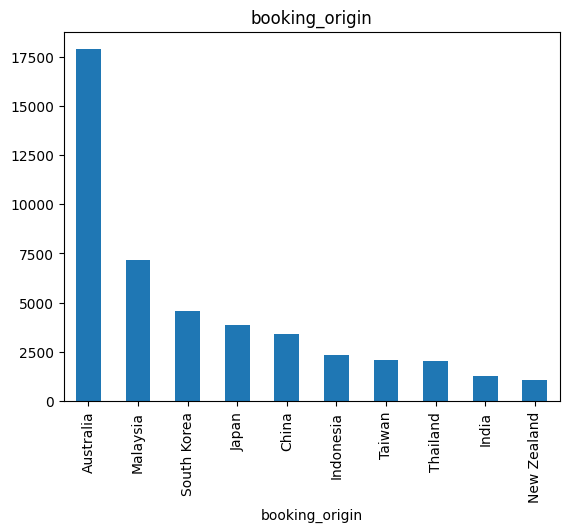

In [26]:
feature = categorical_features[3]
count = df[feature].value_counts().head(10)
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Count': count, 'Percent': percent})
print(data)
count.plot(kind='bar', title=feature)



**Numerical Features**

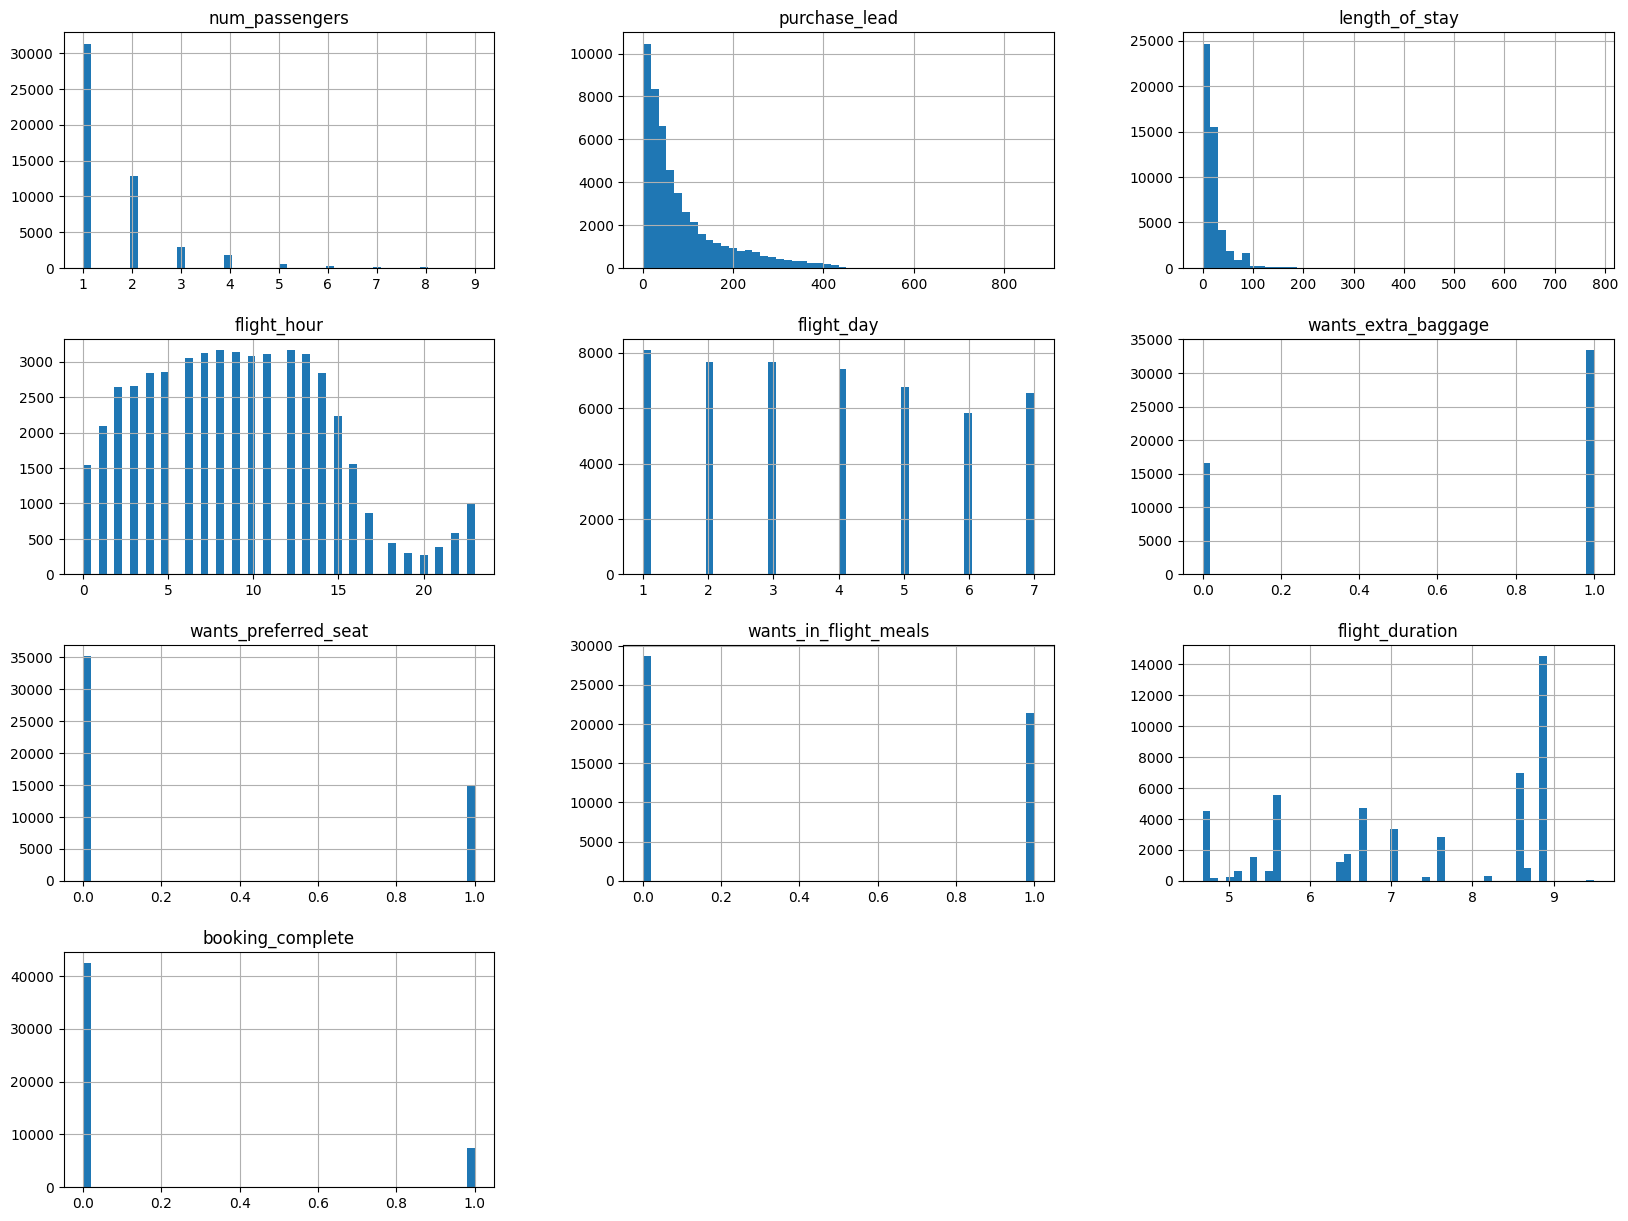

In [27]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

#**Multivariate Analysis**

<ipython-input-28-860290886155>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


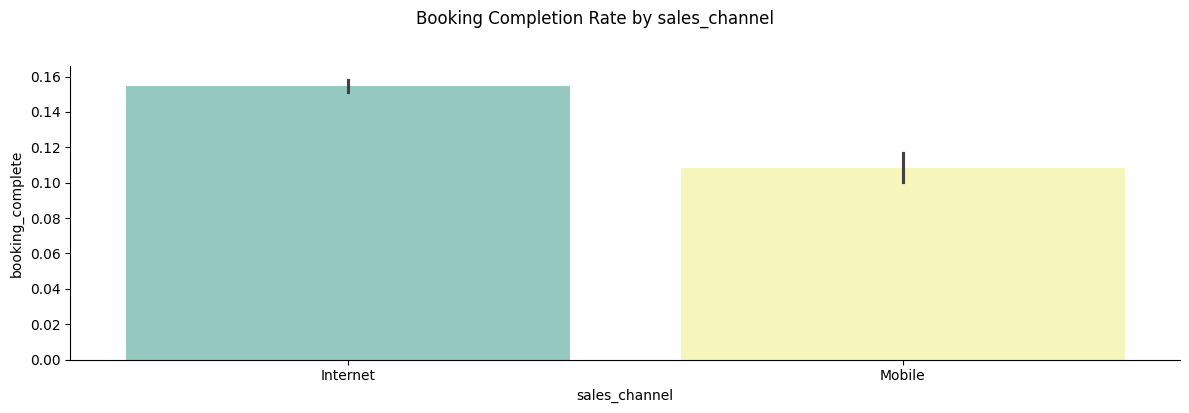

<ipython-input-28-860290886155>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


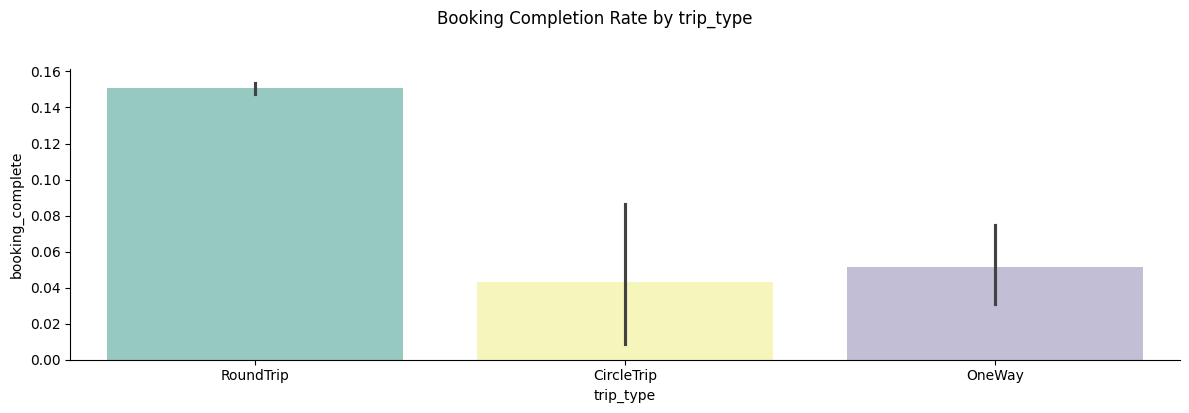

<ipython-input-28-860290886155>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


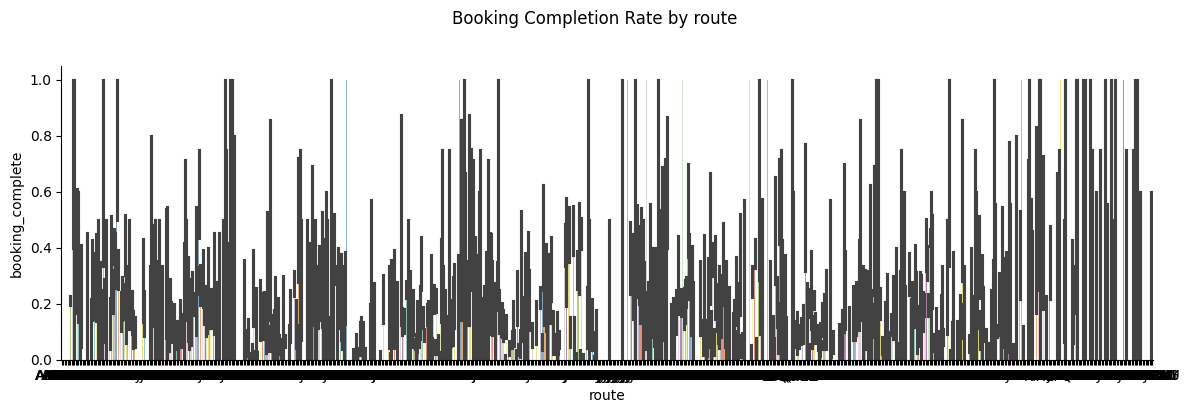

<ipython-input-28-860290886155>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


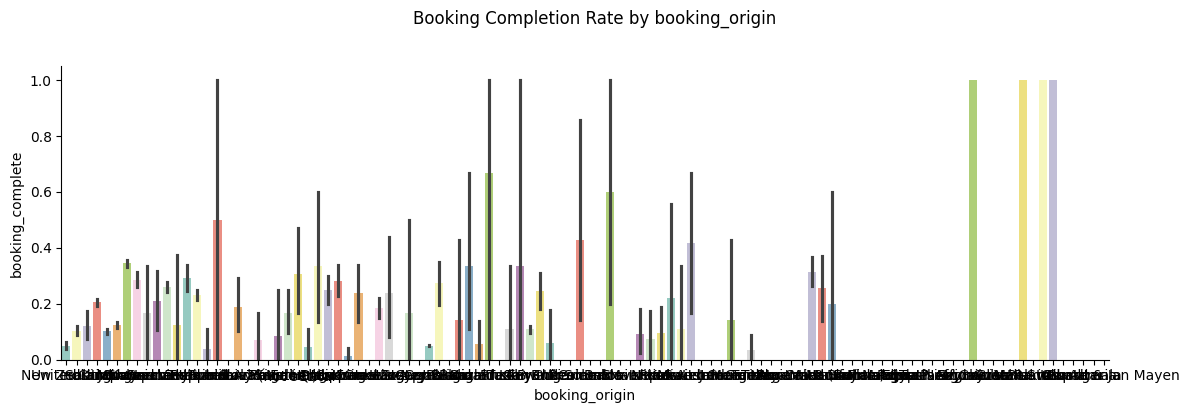

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    g = sns.catplot(
        x=col,
        y='booking_complete',
        kind='bar',
        dodge=False,
        height=4,
        aspect=3,
        data=df,
        palette="Set3"  # <- typo diperbaiki
    )
    g.fig.suptitle(f"Booking Completion Rate by {col}", y=1.02)  # Judul otomatis
    plt.tight_layout()
    plt.show()


**Numerical Features**

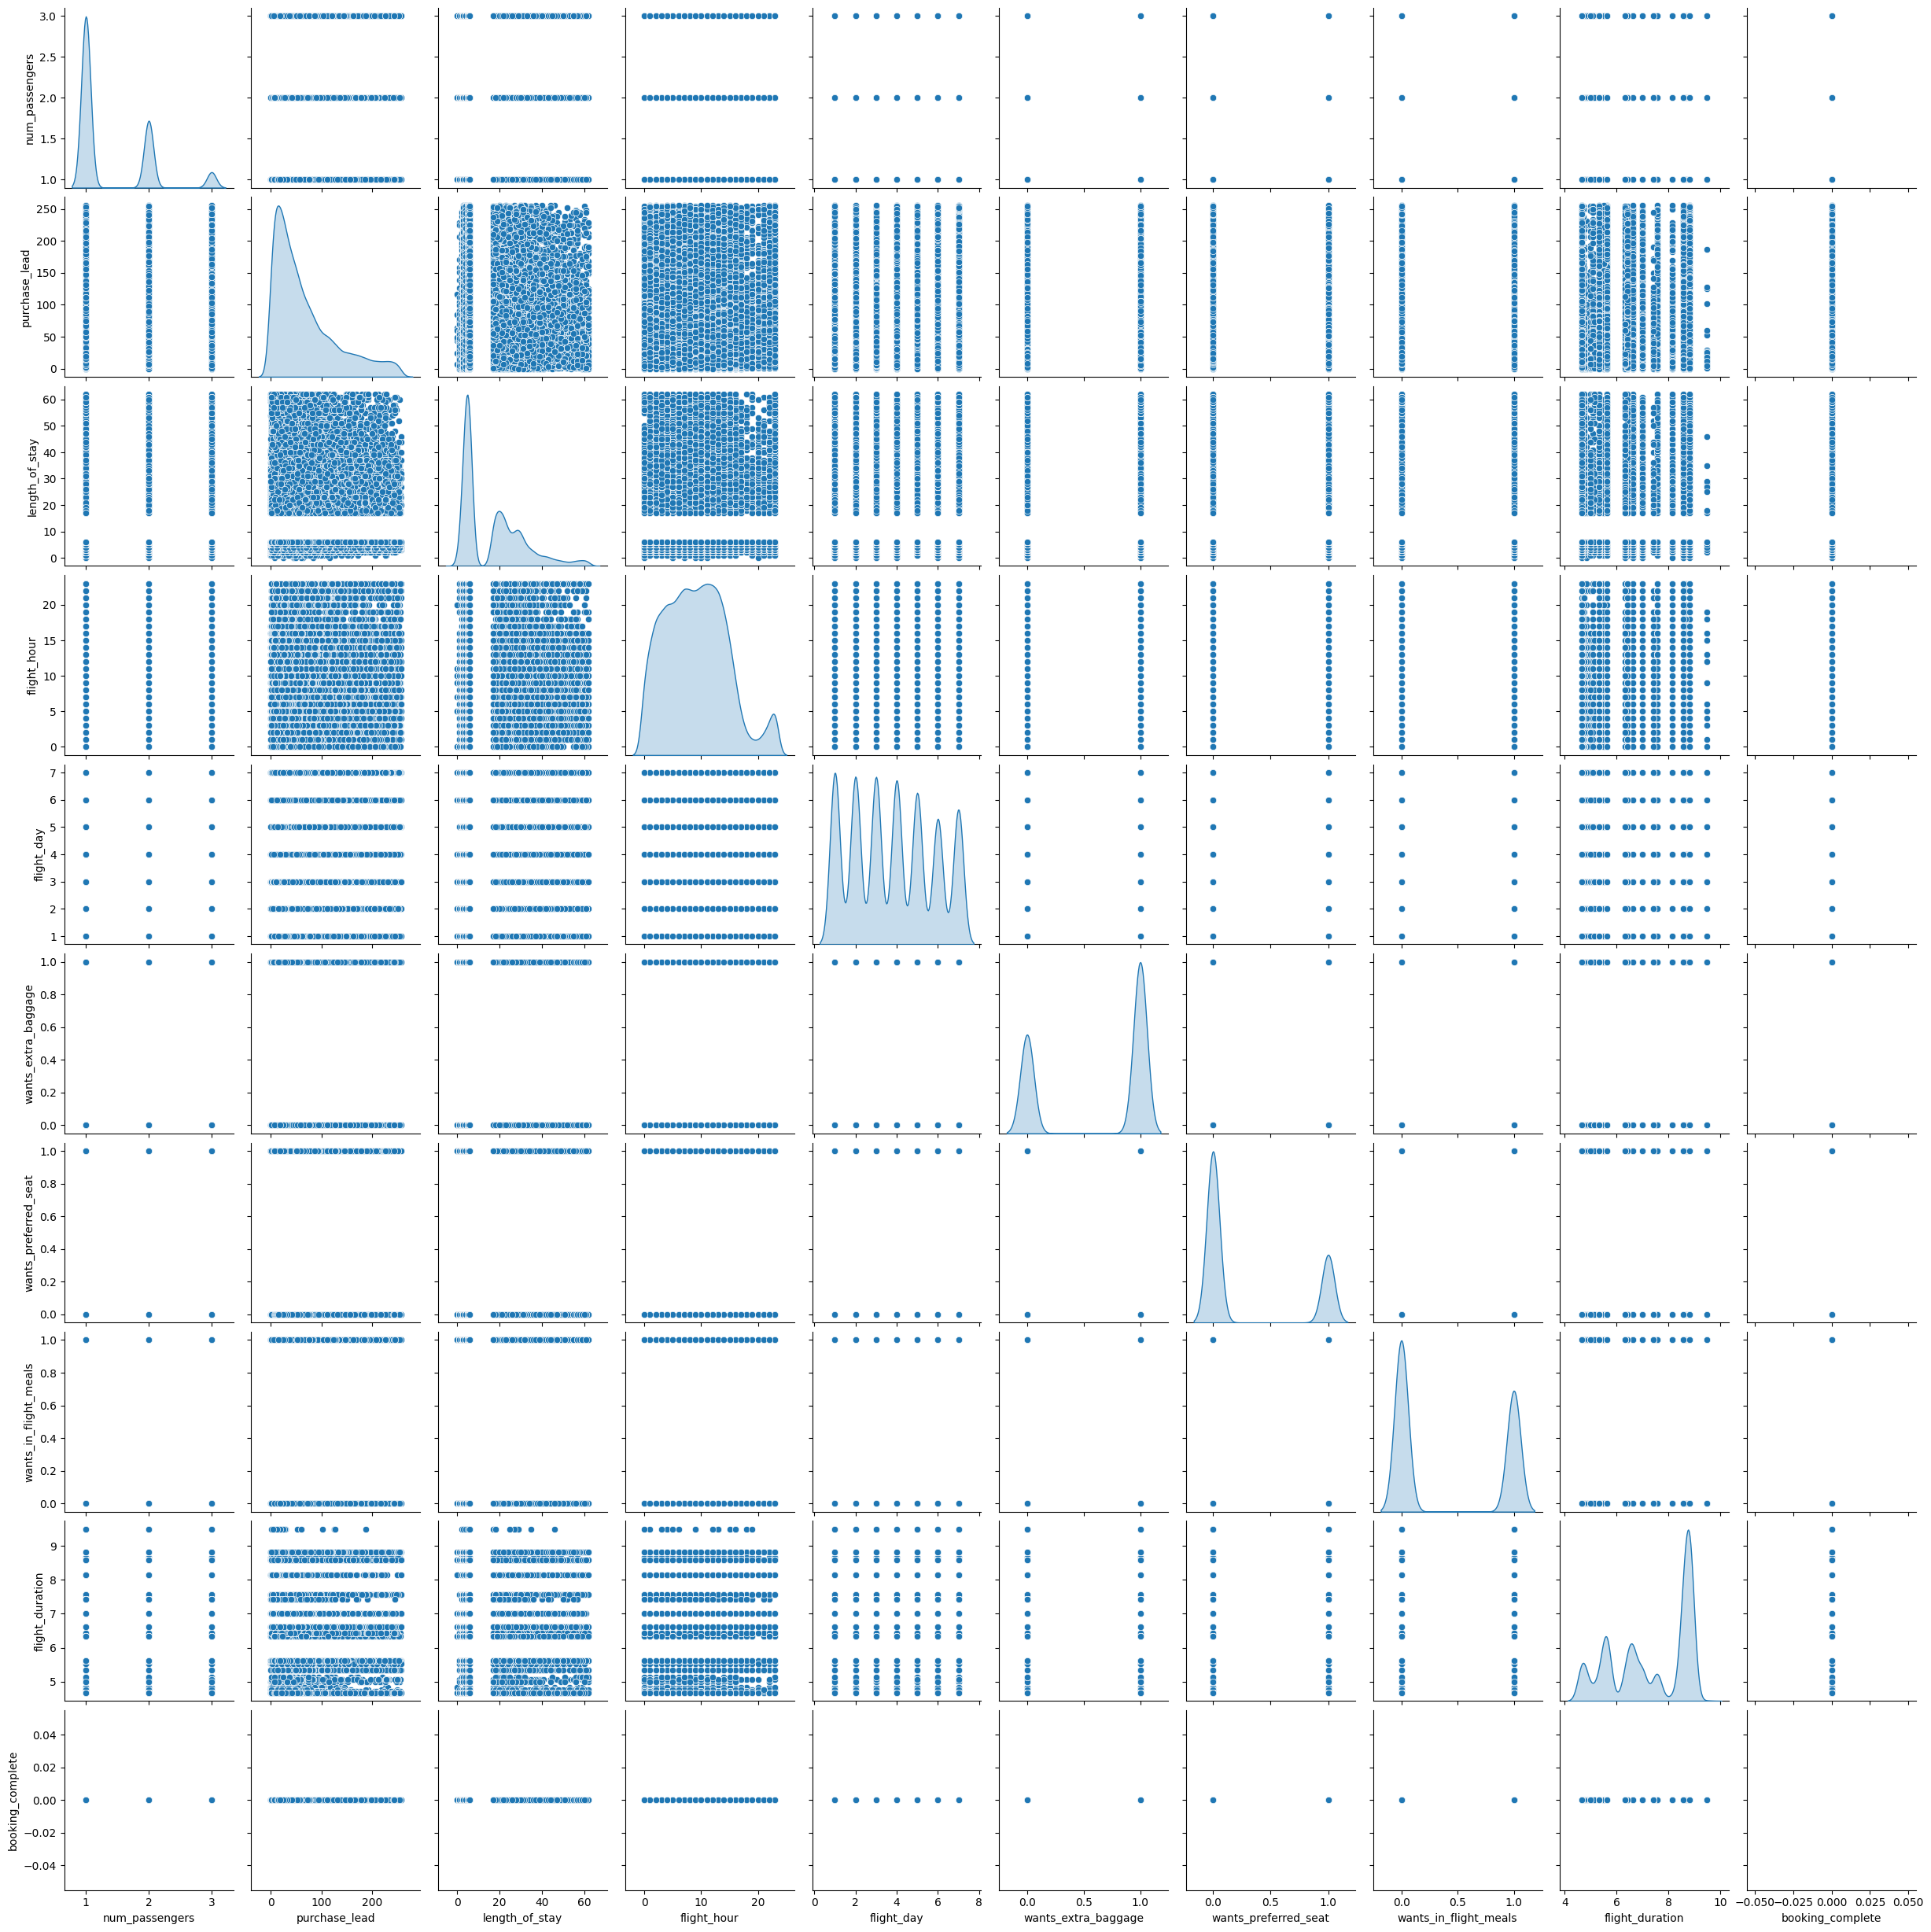

In [29]:
sns.pairplot(diamonds, diag_kind='kde')

#**Mutual Information**

In [30]:
X = df.drop('booking_complete', axis=1)
y = df.booking_complete

for colname in X.select_dtypes("object"):
  X[colname], _ = X[colname].factorize()


In [31]:
X.dtypes

,0
num_passengers,int64
sales_channel,int64
trip_type,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,int64
booking_origin,int64
wants_extra_baggage,int64


In [32]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_score = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info_score, name="Mutual Information", index=X.columns)
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

,Mutual Information
route,0.052335
booking_origin,0.047422
flight_duration,0.015807
length_of_stay,0.009745
wants_extra_baggage,0.007700
wants_in_flight_meals,0.004590
wants_preferred_seat,0.003851
num_passengers,0.002353
flight_day,0.002157
trip_type,0.001741


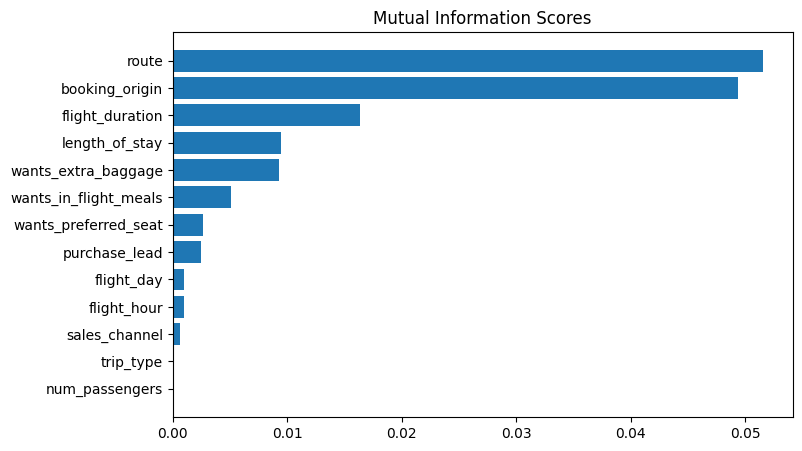

In [36]:
def mutual_info_plot(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
mutual_info_plot(mutual_info)

5 Fitur dengan MI scores tertingg:
- route
- booking_origin
- flight_duration
- length_of_stay
- wants_extra_baggage

**Split Dataset**

In [37]:
from sklearn.model_selection import train_test_split

def split_dataset(X, y, test_size=0.2, val_size=0.25, random_state=0):
    # Pertama bagi jadi train_full dan validation
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Lalu bagi train_full menjadi train dan test
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=val_size, random_state=random_state)

    return {
        'train_X': train_X,
        'train_y': train_y,
        'val_X': val_X,
        'val_y': val_y,
        'test_X': test_X,
        'test_y': test_y
    }

In [38]:
from sklearn.preprocessing import MinMaxScaler
def scale(X):
  scaler = MinMaxScaler()
  scaler.fit(X)
  return X

**Model Development**

In [47]:
!pip install category_encoders
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
from category_encoders import OneHotEncoder


X = df[['route', 'booking_origin', 'flight_duration', 'length_of_stay', 'wants_extra_baggage']]
y = df['booking_complete']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(cols=['route', 'booking_origin'], handle_unknown='ignore')

# Fit and transform the encoder on your training data
X = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model dictionary
models = {
    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Training
    y_pred = model.predict(X_test)          # Predict untuk validation
    y_proba = model.predict_proba(X_test)[:, 1]  # Predict probability untuk AUC
    acc = accuracy_score(y_test, y_pred)    # Accuracy
    auc = roc_auc_score(y_test, y_proba)     # AUC Score
    results.append({
        'Model': name,
        'Accuracy': acc,
        'AUC Score': auc
    })

# Tampilkan hasil
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='AUC Score', ascending=False))

               Model  Accuracy  AUC Score
2  Gradient Boosting    0.8492   0.760946
0      Random Forest    0.8250   0.730969
1                KNN    0.8332   0.688033


In [48]:
results_df

,Model,Accuracy,AUC Score
0,Random Forest,0.8250,0.730969
1,KNN,0.8332,0.688033
2,Gradient Boosting,0.8492,0.760946


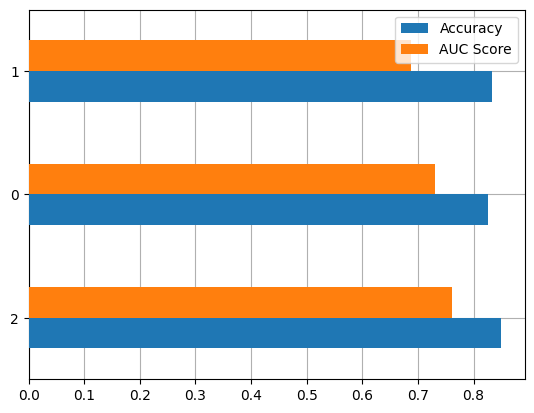

In [49]:
fig, ax = plt.subplots()
results_df.sort_values(by='AUC Score', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)